In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.01577909 0.02807614 0.02853252 ... 0.02143909 0.03648638 0.00186446]
 [0.06952641 0.12371012 0.12572105 ... 0.09446572 0.16076766 0.00821525]
 [0.3092669  0.5502865  0.55923149 ... 0.42020177 0.71512559 0.03654303]
 ...
 [0.30728655 0.54676282 0.55565054 ... 0.41751107 0.71054639 0.03630904]
 [0.2817684  0.50135772 0.50950737 ... 0.38283949 0.65154012 0.03329381]
 [0.12244893 0.21787652 0.22141814 ... 0.1663717  0.28314174 0.01446859]]

Noisy Matrix (with Homoscedastic Noise):
[[-0.10131435 -0.2353705  -0.09153705 ...  0.02518465  0.10304483
   0.03878993]
 [ 0.12180043  0.04912684  0.20410529 ... -0.01524174  0.2826129
  -0.0019994 ]
 [ 0.3808648   0.48403957  0.45965461 ...  0.49656483  0.65573986
   0.05155621]
 ...
 [ 0.26308595  0.53200348  0.48134377 ...  0.3241001   0.71569474
   0.1451867 ]
 [ 0.27524981  0.5413805   0.3750591  ...  0.29314098  0.63013584
   0.01058694]
 [ 0.24080216  0.23851806  0.34278614 ...  0.20263118  0.26463013
   0.084

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


The array does not contain any missing values.
[-0.00409864 -0.02380412  0.230506    0.25567069  0.28488413 -0.1402308
 -0.01096034  0.17012836  0.12732261  0.23432086  0.00040919  0.12133347
 -0.27959292 -0.28678082 -0.0651093   0.22436728  0.10640163 -0.19734091
 -0.2922327  -0.01155262 -0.09526219 -0.12951296  0.31946103  0.17517925
 -0.25689691 -0.31095547 -0.19528285  0.11242548  0.10387025 -0.25726031
  0.11909668 -0.27469762  0.22448673  0.29751157 -0.16022461  0.10796684
  0.08001126 -0.10198601  0.2955906   0.06082494 -0.20472861 -0.24643813
 -0.11394385 -0.02051398  0.00177933 -0.01823196 -0.07276938  0.01612957
  0.07429262  0.07986058]
[ 0.0768882   0.17476834 -0.14879048 -0.03775755  0.13315855 -0.08273384
  0.10831861  0.17708702 -0.03486077  0.31434541 -0.0467613  -0.36994096
 -0.16301152  0.05685977 -0.04796938 -0.25661478  0.17841618  0.01529536
 -0.38000405  0.169379    0.01976944  0.2416584  -0.0356761   0.0019196
 -0.1650403   0.15949089  0.02170979  0.04843152 -0.1

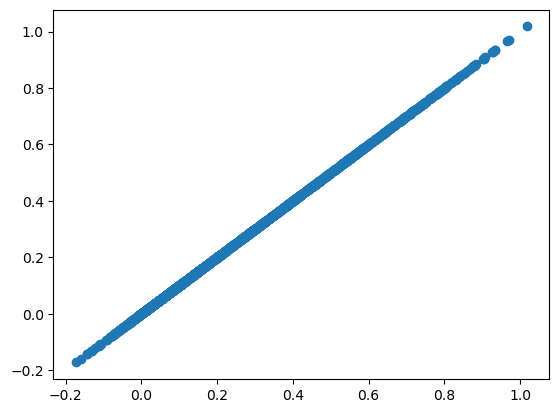

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

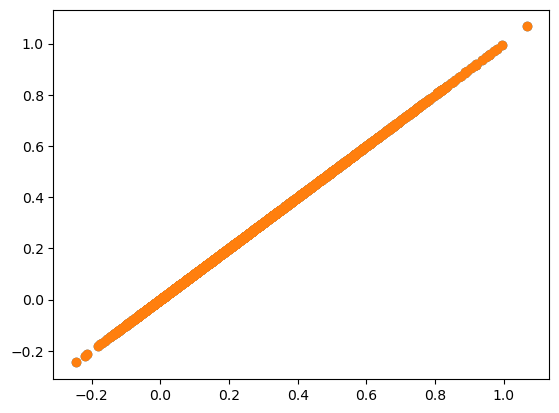

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
mycebmf.tau

array([[144.44868624, 144.44868624, 144.44868624, ..., 144.44868624,
        144.44868624, 144.44868624],
       [144.44868624, 144.44868624, 144.44868624, ..., 144.44868624,
        144.44868624, 144.44868624],
       [144.44868624, 144.44868624, 144.44868624, ..., 144.44868624,
        144.44868624, 144.44868624],
       ...,
       [144.44868624, 144.44868624, 144.44868624, ..., 144.44868624,
        144.44868624, 144.44868624],
       [144.44868624, 144.44868624, 144.44868624, ..., 144.44868624,
        144.44868624, 144.44868624],
       [144.44868624, 144.44868624, 144.44868624, ..., 144.44868624,
        144.44868624, 144.44868624]])

In [9]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

norm
[0.04307512 0.61566958 2.61247949 0.5659268  2.89524108 1.36507951
 0.26738787 1.0199269  0.9442482  0.54235248 2.5911403  1.76373901
 2.57697535 0.43076057 3.68837339 2.30059477 2.15109111 1.48852565
 1.27111706 0.98174494 2.93831886 3.16930871 3.51903611 0.75239407
 0.3472016  3.58177854 2.82798397 2.94183785 1.2690349  0.61156821
 0.58791237 2.41359716 1.01420268 1.51484425 1.10113886 0.31623457
 0.6916381  3.40279747 3.37938455 2.0586392  1.40962526 1.85477199
 1.15424637 0.72961378 2.24176067 2.27409169 3.56810555 2.7809691
 2.403037   1.15275351]
norm
(50,)
(50,)
(50, 12)
(40, 12)


In [10]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([0.10859359, 0.20176125, 0.19495658, 0.17998802, 0.00655366,
        0.1822734 , 0.11059603, 0.10334351, 0.14416161, 0.12057192,
        0.11890183, 0.25278466, 0.20453571, 0.06460951, 0.18552831,
        0.02838862, 0.02188065, 0.21710823, 0.04223514, 0.12529436,
        0.22521534, 0.12040988, 0.04860421, 0.24083923, 0.00121666,
        0.17253668, 0.25376133, 0.22757913, 0.04496708, 0.00575212,
        0.05674629, 0.1791391 , 0.21444978, 0.22474239, 0.15245801,
        0.12664324, 0.17218683, 0.14632387, 0.25706034, 0.015795  ]),
 array([0.00572378, 0.00572378, 0.00572378, 0.00572378, 0.00572378,
        0.00572378, 0.00572378, 0.00572378, 0.00572378, 0.00572378,
        0.00572378, 0.00572378, 0.00572378, 0.00572378, 0.00572378,
        0.00572378, 0.00572378, 0.00572378, 0.00572378, 0.00572378,
        0.00572378, 0.00572378, 0.00572378, 0.00572378, 0.00572378,
        0.00572378, 0.00572378, 0.00572378, 0.00572378, 0.00572378,
        0.00572378, 0.00572378, 0.00572378, 0.

[0.04197542 0.61743861 2.61852176 0.56854387 2.9010509  1.36811026
 0.26773235 1.02335706 0.94632024 0.54264424 2.59670457 1.76781993
 2.58333136 0.43219416 3.69711515 2.3049055  2.15696542 1.49184091
 1.27378863 0.98238361 2.94519673 3.17677871 3.52754042 0.75422355
 0.3484104  3.59191298 2.83544035 2.94894661 1.27206981 0.61038609
 0.58869182 2.41930168 1.01710151 1.51938544 1.10399018 0.31757108
 0.69357733 3.41071434 3.38782925 2.06506494 1.41285177 1.85669296
 1.1573736  0.73065566 2.24711592 2.27912491 3.57551337 2.78633769
 2.4074021  1.15490439]
norm
(50,)
(50,)
(50, 12)
(40, 12)
[-5.55016971e-83 -3.32149985e-82  3.14037966e-81  3.51155201e-81
  3.84545685e-81 -1.93772409e-81 -1.39005631e-82  2.31832942e-81
  1.77368933e-81  3.24222360e-81 -2.13040982e-84  1.65536461e-81
 -3.88521111e-81 -3.96774251e-81 -8.89959193e-82  3.06819149e-81
  1.40563891e-81 -2.66185013e-81 -4.04753594e-81 -1.69626095e-82
 -1.35904578e-81 -1.79367030e-81  4.37389009e-81  2.43625171e-81
 -3.51730853e-8

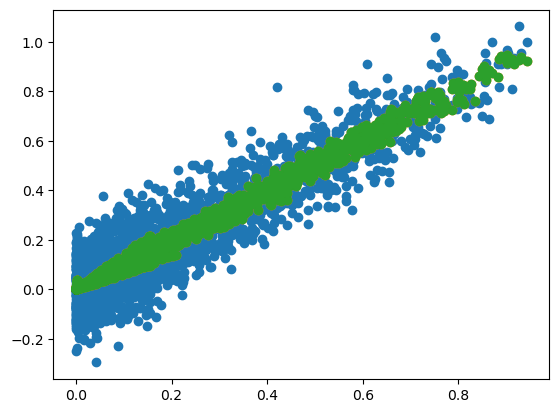

In [26]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


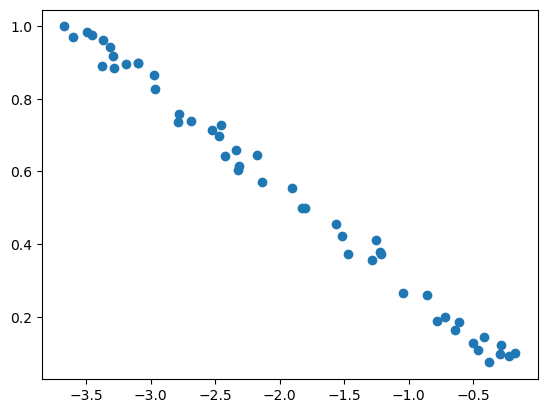

In [21]:
plt.scatter(mycebmf.L[:,0], u)

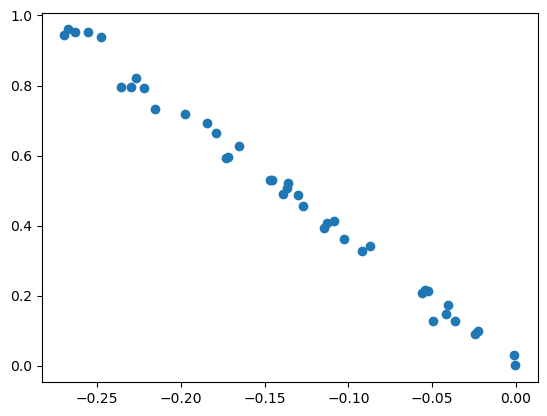

In [22]:
plt.scatter(mycebmf.F[:,0], v)

In [24]:
mycebmf.L[:,1]

array([-1.71461649e-35, -7.53867650e-36, -8.11356612e-36,  1.44126758e-36,
        4.43544979e-35,  1.34672422e-35, -3.05288058e-35,  4.76883266e-36,
        2.09458388e-35, -8.12003634e-36,  8.97100362e-36,  2.79707192e-35,
       -2.41678110e-35,  1.92857162e-35, -1.62397955e-35,  2.61773380e-35,
       -2.04496338e-35,  2.64066228e-35, -4.36450078e-35,  2.88434743e-35,
        4.33262643e-36, -1.74510744e-35, -2.51805460e-35, -4.35762780e-35,
        1.89708152e-35,  9.12872917e-36,  5.48386881e-36,  2.83503274e-36,
       -2.57737936e-35,  3.48688717e-35, -5.20471714e-37, -3.37648541e-36,
       -1.92989270e-35, -3.47772512e-35, -2.59081414e-35,  3.06416579e-35,
        1.42182206e-35, -1.63803964e-35,  7.46372237e-36,  4.38222701e-35,
        9.75644052e-36,  3.34957793e-35,  1.32935476e-35, -1.53868656e-35,
       -1.80281067e-35,  1.35263878e-36, -5.40421207e-36,  5.18041695e-35,
       -1.56219446e-35,  8.01589432e-36])